# 혼공머 06-3
> 주성분 분석

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "혼공머"]

# 주로쓰는 패키지들

In [4]:
#collapse
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
#___________________________________

from sklearn.neighbors import KNeighborsClassifier # k 최근접이웃
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # 결정계수 
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차 평균을 반환
from sklearn.linear_model import LinearRegression # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures #다중회귀로의 변환기
from sklearn.preprocessing import StandardScaler #규제
from sklearn.linear_model import Ridge #릿지
from sklearn.linear_model import Lasso #라쏘
from sklearn.linear_model import LogisticRegression # 로지스틱회귀
from scipy.special import expit #시그모이드함수
from scipy.special import softmax #소프트맥스함수
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법
from sklearn.tree import DecisionTreeClassifier # 트리
from sklearn.tree import plot_tree # 트리 모형
from sklearn.model_selection import cross_validate # 교차 검증
from sklearn.model_selection import StratifiedKFold # Kfold 교차 검증
from sklearn.model_selection import GridSearchCV # 그리드 서치 (하이퍼 파라미터 튜닝)
from scipy.stats import uniform, randint #랜덤 서치
from sklearn.model_selection import RandomizedSearchCV # 랜덤 서치 클래스
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 앙상블
from sklearn.ensemble import ExtraTreesClassifier # 엑스트라 트리 앙상블
from sklearn.ensemble import GradientBoostingClassifier # 그레이디언트 부스팅 앙상블

# 히스토그램 기반 그레이디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance # 특성중요도
from xgboost import XGBClassifier # 알고리즘을 구현한 또다른 라이브러리1
from lightgbm import LGBMClassifier # 알고리즘을 구현한 또다른 라이브러리2 , 마이크로소프트에서 구현 


# ____________________
from sklearn.cluster import KMeans # KMeans
from sklearn.decomposition import PCA # 주성분 분석


# 차원과 차원 축소

> 특성 : 데이터가 가진 속성 = 차원

> 비지도 학습 작업 중 하나 : 차원 축소

> 차원 축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상

> 주성분 분석 : 대표적 차원 축소 알고리즘 = PCA

# 주성분 분석

> 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해

> 분산 : 데이터가 널리 퍼져있는 정도를 말함

> 주성분 벡터의 원소 수 = 원본 데이터셋에 있는 특성 수

> 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.

# PCA 클래스

다운로드 !wget https://bit.ly/fruits_300_data -O fruits_300.npy

In [3]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
# 주성분 분석 알고리즘
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
# 주성분 확인
print(pca.components_.shape)

(50, 10000)


> n_components=50 로 지정했기 때문에 첫 번째 차원이 50 (50개의 주성분) , 두 번째 차원은 데이터수

> 데이터수가 같으므로 이미지 출력 가능

In [8]:
def draw_fruits(arr, ratio=1):
    n = len(arr)    
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:   
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

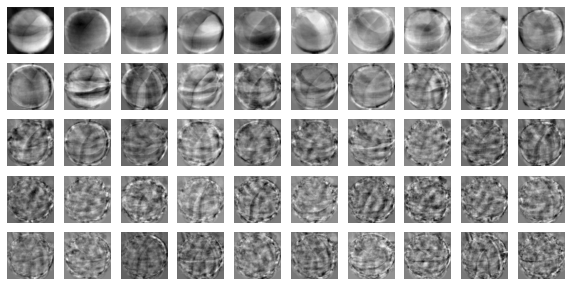

In [9]:
# 앞 절 함수 사용
draw_fruits(pca.components_.reshape(-1, 100, 100))

> 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개 로 줄일 수 있다.

In [10]:
print(fruits_2d.shape)

(300, 10000)


In [11]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


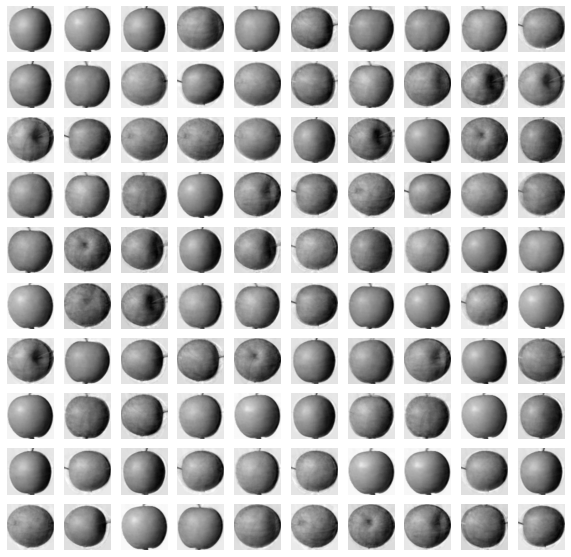

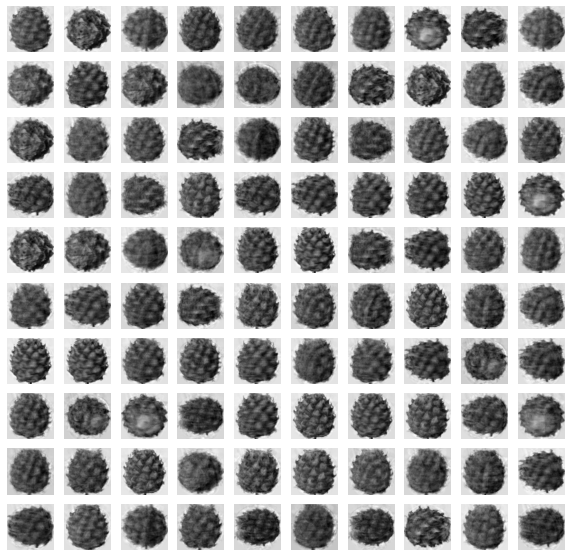

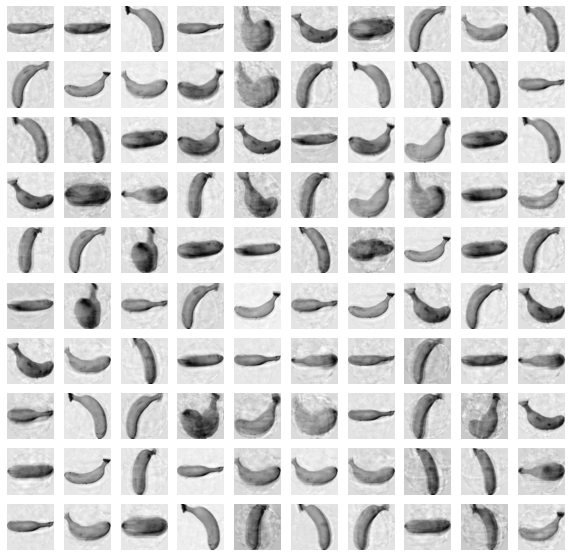

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

> 특성이 잘 복원 됨

# 설명된 분산 explained variance

> 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [14]:
# 분산의 비율 출력
print(np.sum(pca.explained_variance_ratio_))

0.9215569399184715


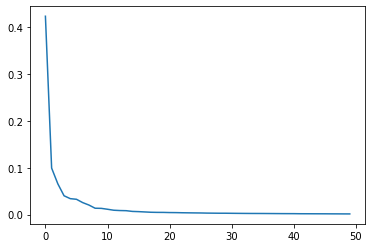

In [15]:
# 분산 그래프 출력
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 다른 알고리즘과 함께 사용하기

In [16]:
lr = LogisticRegression()

In [17]:
# 타깃 데이터 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [19]:
# 교차 검증
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.40227322578430175


축소 값과 비교

In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.01966242790222168


In [21]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 만들기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [22]:
print(pca.n_components_)

2


In [23]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03802709579467774


/home/cjfal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/home/cjfal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


> 로지스틱 회귀모델이 완전히 수렴하지 못해서 경고

> 특성 2개만 사용했는데 정확도가 99%

In [25]:
# k-means 알고리즘으로 클러스터 찾아보기
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


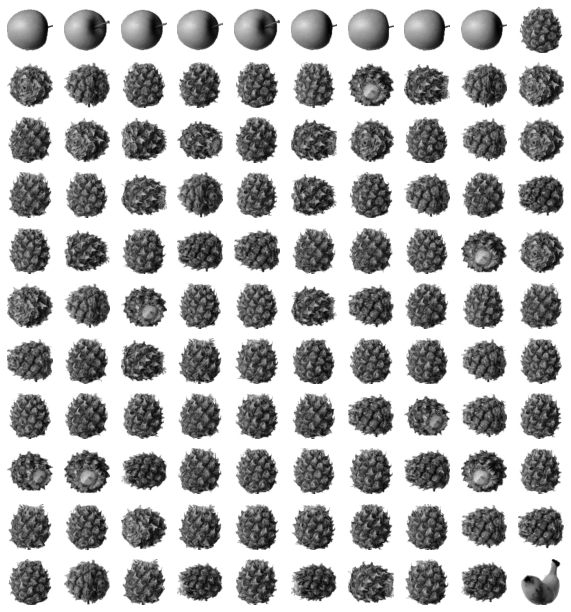

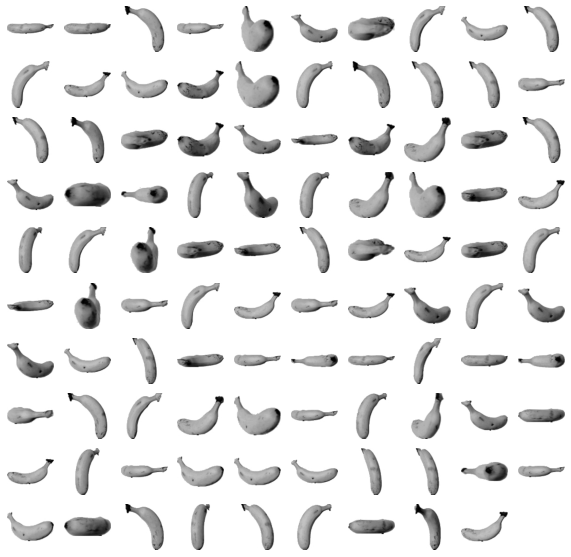

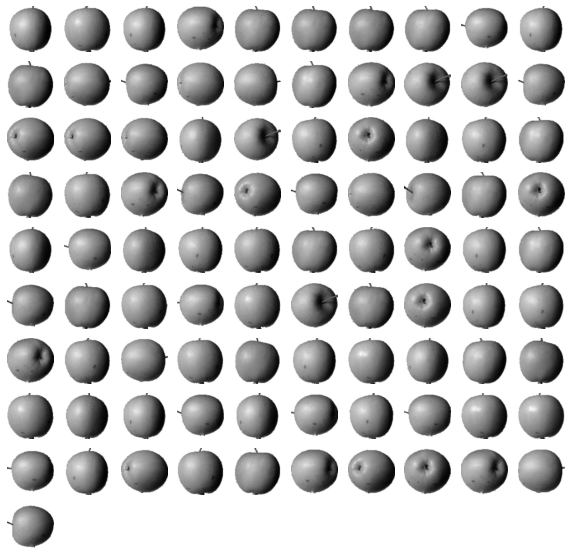

In [26]:
# 과일 이미지 출력
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

> 파인애플은 사과와 조금 혼동됨

> 차원을 줄여 시각화에 이득이 됨

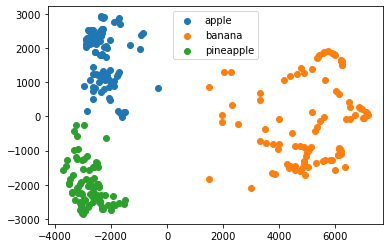

In [27]:
# 클러스터 별로 나누어 산점도 그리기
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# **마무리**

`*` 키워드로 끝내는 핵심 포인트

`-` **차원 축소** : 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류입니다. 차원 축소는 저장 공간을 줄이고 시각화하기 쉽습니다. 또한 다른 알고리즘의 성능을 높일 수도 있습니다.

`-` **주성분 분석** : 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법입니다. 이런 방향을 주성분이라고 부릅니다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있습니다. 일반적으로 주성분은 원보 데이터에 있는 특성 개수보다 작습니다.

`-` **설명된 분산** : 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것입니다. 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있습니다.

`*` **핵심 패키지**

`*` scikit-learn

> `1` PCA : 주성분 분석을 수행하는 클래스입니다.

>>`-`n_components는 주성분의 개수를 지정합니다. 기본값은 None으로 샘플 개수와 특성 개수 중에 작은 것의 값을 사용합니다.

>>`-`random_state에는 넘파이 난수 시드 값을 지정할 수 있습니다.

>>`-`components_ 속성에는 훈련 세트에서 찾은 주성분이 저장됩니다.

>>`-`explained_variance_ 속성에는 설명된 분산이 저장되고, explained_variance_ratio_에는 설명된 분산의 비율이 저장됩니다.

>>`-`inverse_transform() 메서드는 transform() 메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원합니다.